ASSIGNMENT 1 - TF-IDF

In [1]:
t0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
t1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
t2 = "Japan's prime minister, Shinzo Abe, is working  towards healing the economic turmoil in his own country for his view on the future of his people."
t3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
t4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
t5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
t6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
import sys
import en_core_web_sm
nlp = en_core_web_sm.load()
nlp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def lemmatize(Doc):
    return [
        token.lemma_ for token in Doc
        if not token.is_punct and not token.is_space
        and not token.lower_ in STOP_WORDS
        and (not token.tag_ == "POS" or token.text == "'s") and not token.text == "US"
    ]

In [4]:
x = input('Enter a word: ') 

def tf(x, Doc):   
    l = lemmatize(Doc)
    return l.count(' '.join((lemmatize(nlp(x)))))


Enter a word: Economy


In [5]:
tf(x, nlp(t0))

2

In [6]:
x = input('Enter a word: ')
Docs = [nlp(x) for x in [t0, t1, t2, t3, t4, t5, t6]] #List of Docs

def idf(x, Docs):
    doc_number = 0   
    for elem in Docs:
        l = lemmatize(elem)
        if l.count(' '.join(lemmatize(nlp(x)))) > 0:
            doc_number += 1
    if doc_number>0:
        return 1/doc_number
    else:
        return 0
    #return 1 / doc_number if doc_number else 0

Enter a word: Economy


In [7]:
idf(x, Docs)

0.3333333333333333

In [8]:
def tf_idf(x, Doc, Docs):
    t_f = tf(x, Doc)
    i_d_f = idf(x, Docs)
    return t_f * i_d_f

In [9]:
tf_idf(x, nlp(t0), Docs)

0.6666666666666666

In [10]:
def all_lemmas(Docs):
    all = set()
    for Doc in Docs:
        all |= set(lemmatize(Doc))
        #all.update(set(lemmatize(docs)))
        #all = lemmas.union(set(lemmatize(doc)))
    return all


In [11]:
all_lemmas(Docs)

{"'s",
 'abe',
 'abenomics',
 'accelerate',
 'ask',
 'be',
 'china',
 'confront',
 'corruption',
 'country',
 'cuba',
 'daily',
 'deer',
 'differ',
 'domestic',
 'ease',
 'economic',
 'economy',
 'endemic',
 'fall',
 'find',
 'fix',
 'future',
 'greatly',
 'grow',
 'hard',
 'heal',
 'horse',
 'hunt',
 'japan',
 'minister',
 'obama',
 'pace',
 'people',
 'politically',
 'prime',
 'problem',
 'putin',
 'rapid',
 'rid',
 'ruble',
 'russia',
 'russian',
 'sanction',
 'shinzo',
 'shirt',
 'strong',
 'thing',
 'tumble',
 'turmoil',
 'value',
 'view',
 'violence',
 'vladimir',
 'work'}

In [12]:
def tf_idf_doc(Doc, Docs):
    lemmas = all_lemmas(Docs)
    lemma_freq = {x : tf_idf(x, Doc, Docs) for x in lemmas}
    return lemma_freq

In [13]:
tf_idf_doc(nlp(t5), Docs)

{'ease': 1.0,
 'cuba': 1.0,
 'differ': 0.0,
 'ask': 0.0,
 'vladimir': 0.0,
 'hunt': 0.0,
 'turmoil': 0.0,
 'hard': 0.0,
 'view': 0.0,
 'strong': 0.0,
 'prime': 0.0,
 'sanction': 1.0,
 "'s": 0.0,
 'china': 0.0,
 'pace': 0.0,
 'endemic': 0.0,
 'value': 1.0,
 'deer': 0.0,
 'obama': 1.0,
 'economy': 0.3333333333333333,
 'problem': 0.0,
 'japan': 0.0,
 'country': 0.0,
 'greatly': 0.0,
 'confront': 0.0,
 'rapid': 0.0,
 'daily': 1.0,
 'abe': 0.0,
 'rid': 0.0,
 'politically': 0.0,
 'corruption': 0.0,
 'accelerate': 1.0,
 'economic': 0.0,
 'future': 0.0,
 'shirt': 0.0,
 'fall': 1.0,
 'russia': 0.0,
 'tumble': 0.0,
 'violence': 0.0,
 'ruble': 0.5,
 'find': 0.0,
 'abenomics': 0,
 'horse': 0.0,
 'people': 0.0,
 'minister': 0.0,
 'be': 0,
 'putin': 0.0,
 'fix': 0.0,
 'shinzo': 0.0,
 'thing': 0.0,
 'heal': 0.0,
 'work': 0.0,
 'russian': 1.0,
 'grow': 0.0,
 'domestic': 0.0}

In [14]:
def tf_idf_scores(Docs):
    data = pd.DataFrame(tf_idf_doc(Doc, Docs) for Doc in Docs)
    return data

In [15]:
data = tf_idf_scores(Docs)
data

,'s,abe,abenomics,accelerate,ask,be,china,confront,corruption,country,...,shirt,strong,thing,tumble,turmoil,value,view,violence,vladimir,work
0,0.0,0.0,0,0.0,0.0,0,0.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0,0.0,0.0,0,0.5,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.5,0,0.0,0.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.5
3,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.5
4,1.0,0.5,0,0.0,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
5,0.0,0.0,0,1.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


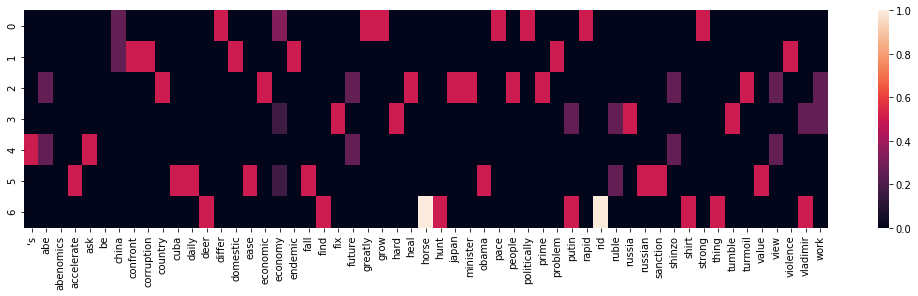

In [16]:
#fig, ax = plt.subplots(figsize=(15,3)) and add ax in sns.heatmap(data_n,ax)
plt.figure(figsize=(18,4))
data_n = (data - data.min().min())/(data.max().max() - data.min().min()) #Normalize the data
sns.heatmap(data_n)